In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pathlib import Path

import plotly.graph_objs as go
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import (mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, silhouette_score, r2_score)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import matplotlib.pyplot as plt
import joblib

In [43]:
df = pd.read_excel('data.xlsx', index_col='ID')
df.info


<bound method DataFrame.info of       Соотношение матрица-наполнитель  Плотность, кг/м3  \
ID                                                        
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
5                            2.767918       2000.000000   
6                            2.569620       1910.000000   
7                            2.561475       1900.000000   
8                            3.557018       1930.000000   
9                            3.532338       2100.000000   
10                           2.919678       2160.000000   
11                           2.877358       1990.000000   
12                           1.598174       1950.000000   
13                           2.919678       1980.000000   
14                      

In [44]:
df.sample(20)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
ID,,,,,,,,,,,,,
711,3.357958,1966.067464,1308.572508,131.839952,25.011512,331.755651,359.127482,76.721556,1930.881497,150.375761,90,7.732436,57.870471
114,3.153404,2019.552159,1063.742781,146.035949,23.695911,295.731698,822.311634,70.648753,2700.665341,194.238670,0,14.051383,74.469002
293,2.359900,1958.082042,601.979357,79.952855,20.676864,276.198096,673.154599,74.555397,2604.616498,140.501979,0,7.956154,53.924112
419,5.040265,1951.741603,632.974268,108.571611,23.795589,234.857805,506.040031,73.920039,2645.789989,294.088087,0,13.378772,50.934182
875,1.726906,1942.949998,762.685952,118.050764,19.371614,318.662924,288.130197,72.501611,2323.033082,211.868724,90,7.083013,68.403660
567,3.927338,1959.650631,1133.894457,108.527433,21.169951,242.068879,594.850652,69.811373,2110.887258,278.622472,90,7.222974,74.685180
972,0.998971,2003.841846,501.504307,157.818752,20.350601,261.670290,928.179874,74.769351,3375.202764,182.599404,90,7.219647,60.980006
200,4.039910,2078.510246,946.559443,121.382365,20.543275,354.235088,309.790444,69.067952,2437.505370,188.265573,0,11.137345,37.407279
594,2.927595,2010.974816,322.072329,79.480157,21.277804,244.022276,432.310929,74.862012,3021.142365,202.334116,90,6.001673,42.318318


In [45]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки           

In [47]:
df['Угол нашивки, град'] = df['Угол нашивки, град'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки           

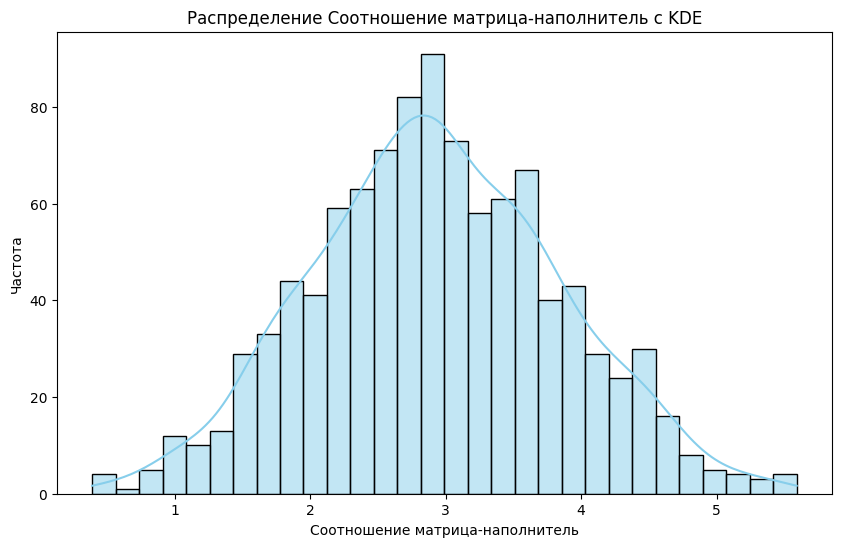

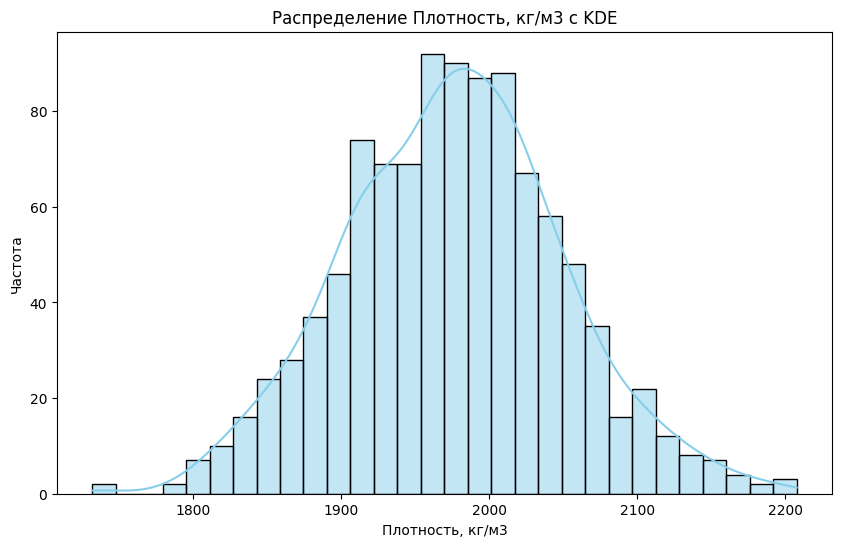

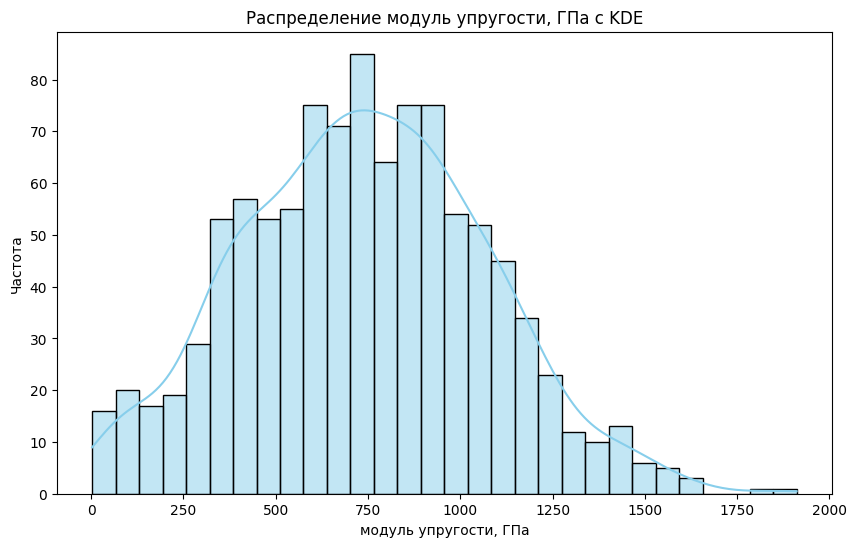

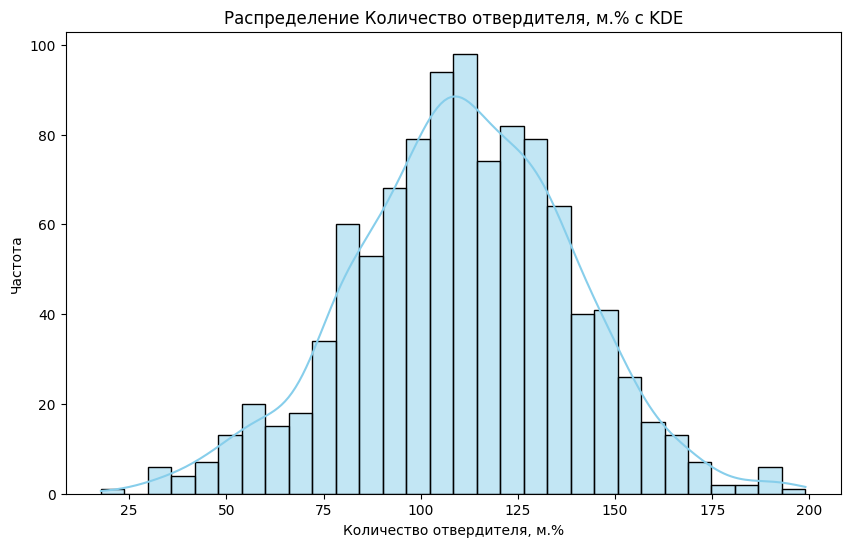

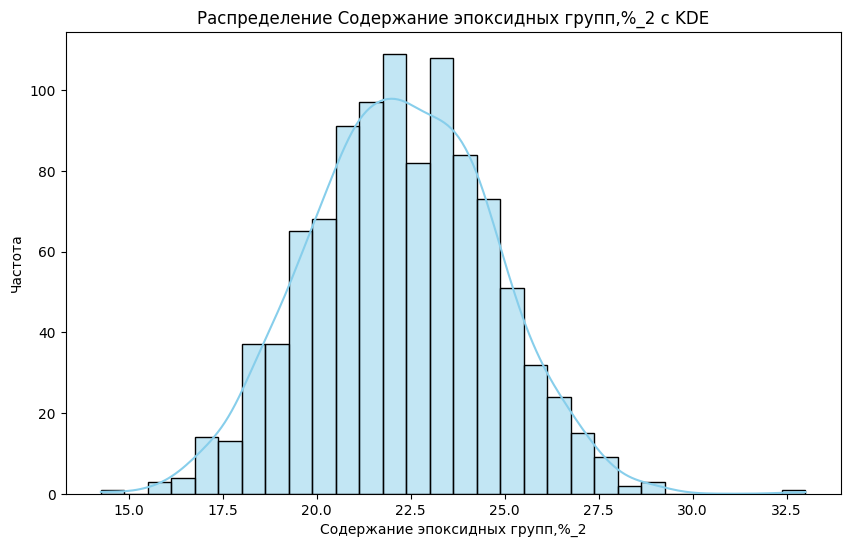

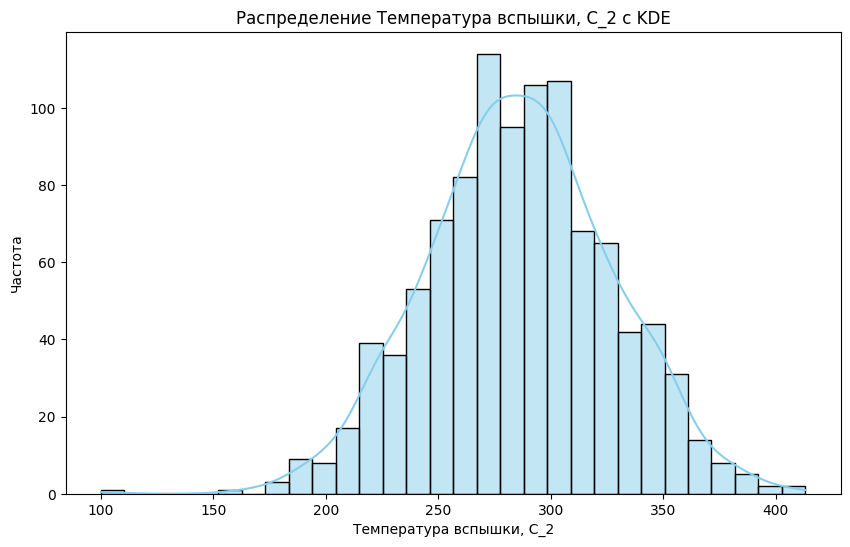

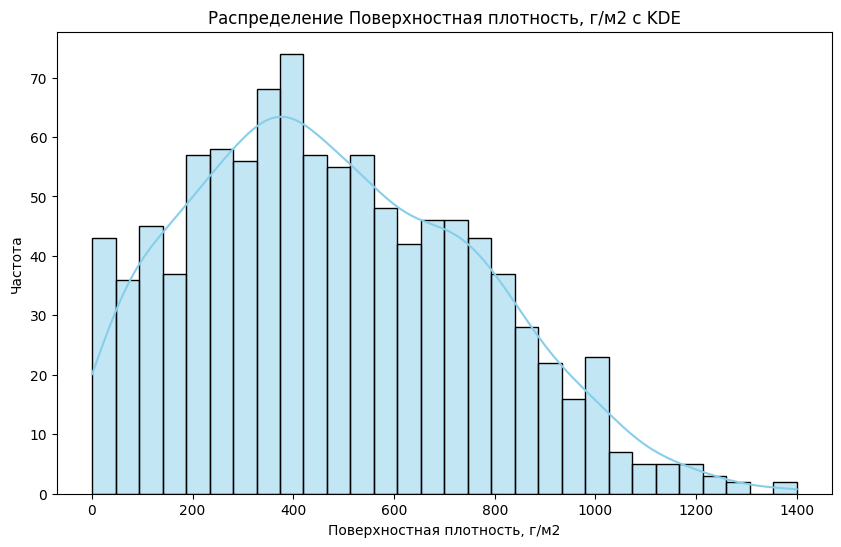

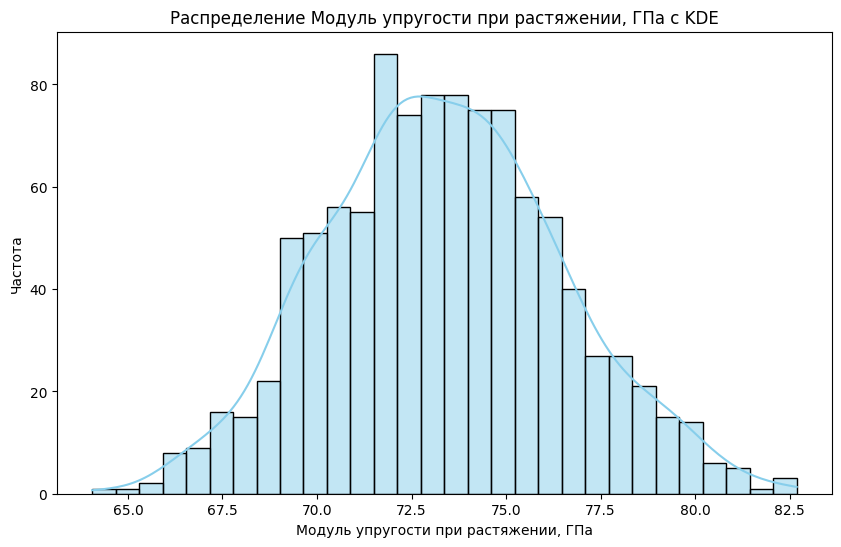

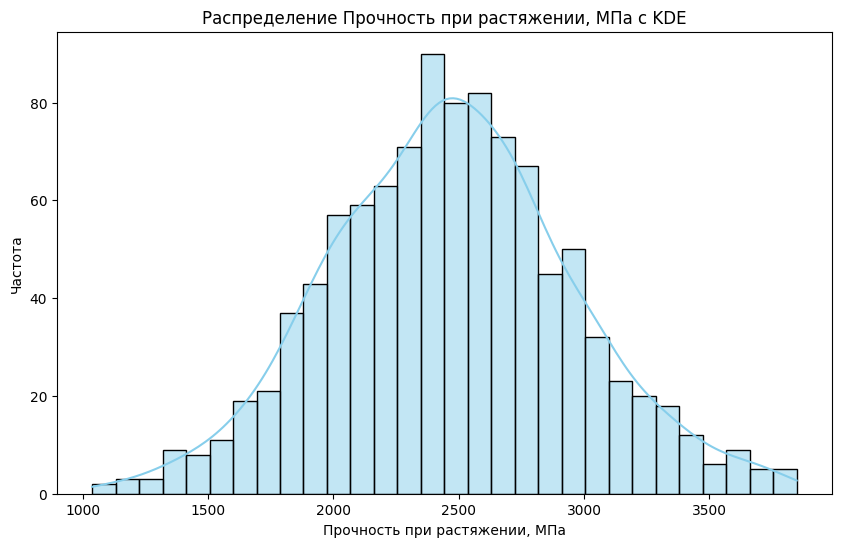

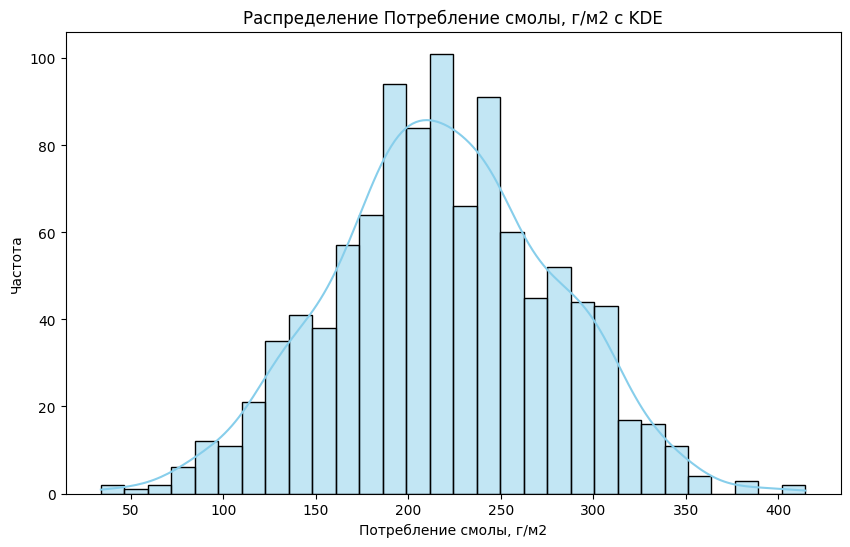

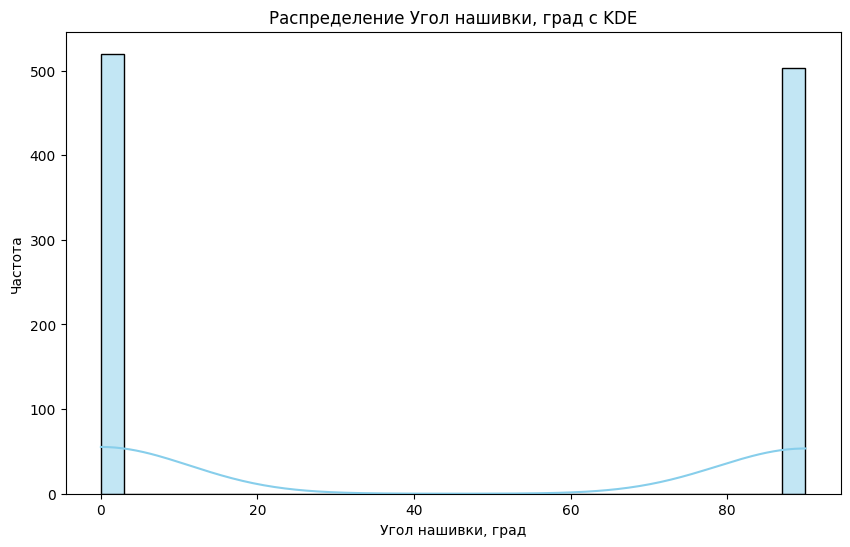

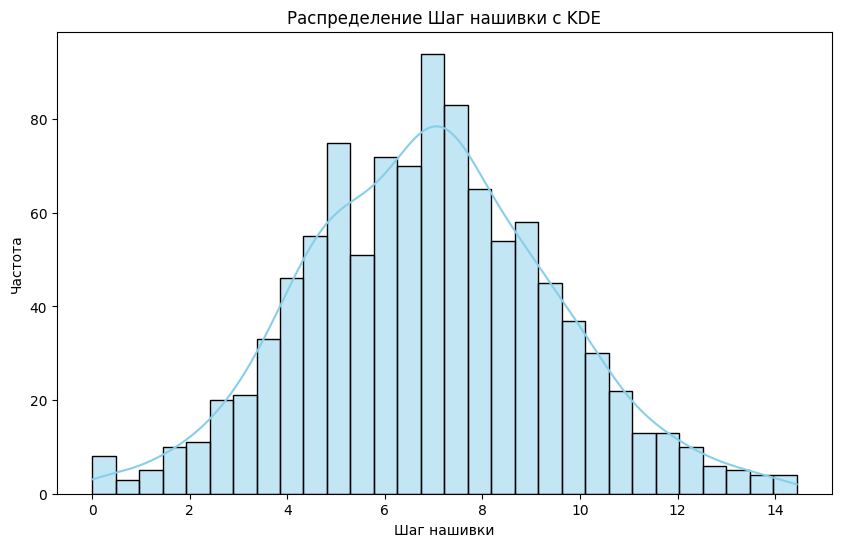

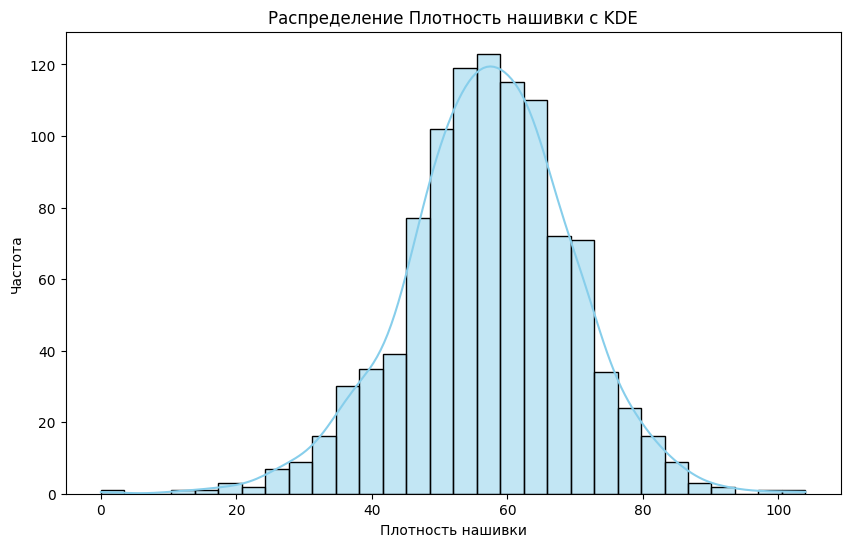

In [48]:
for col in df.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Распределение {col} с KDE')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.show()

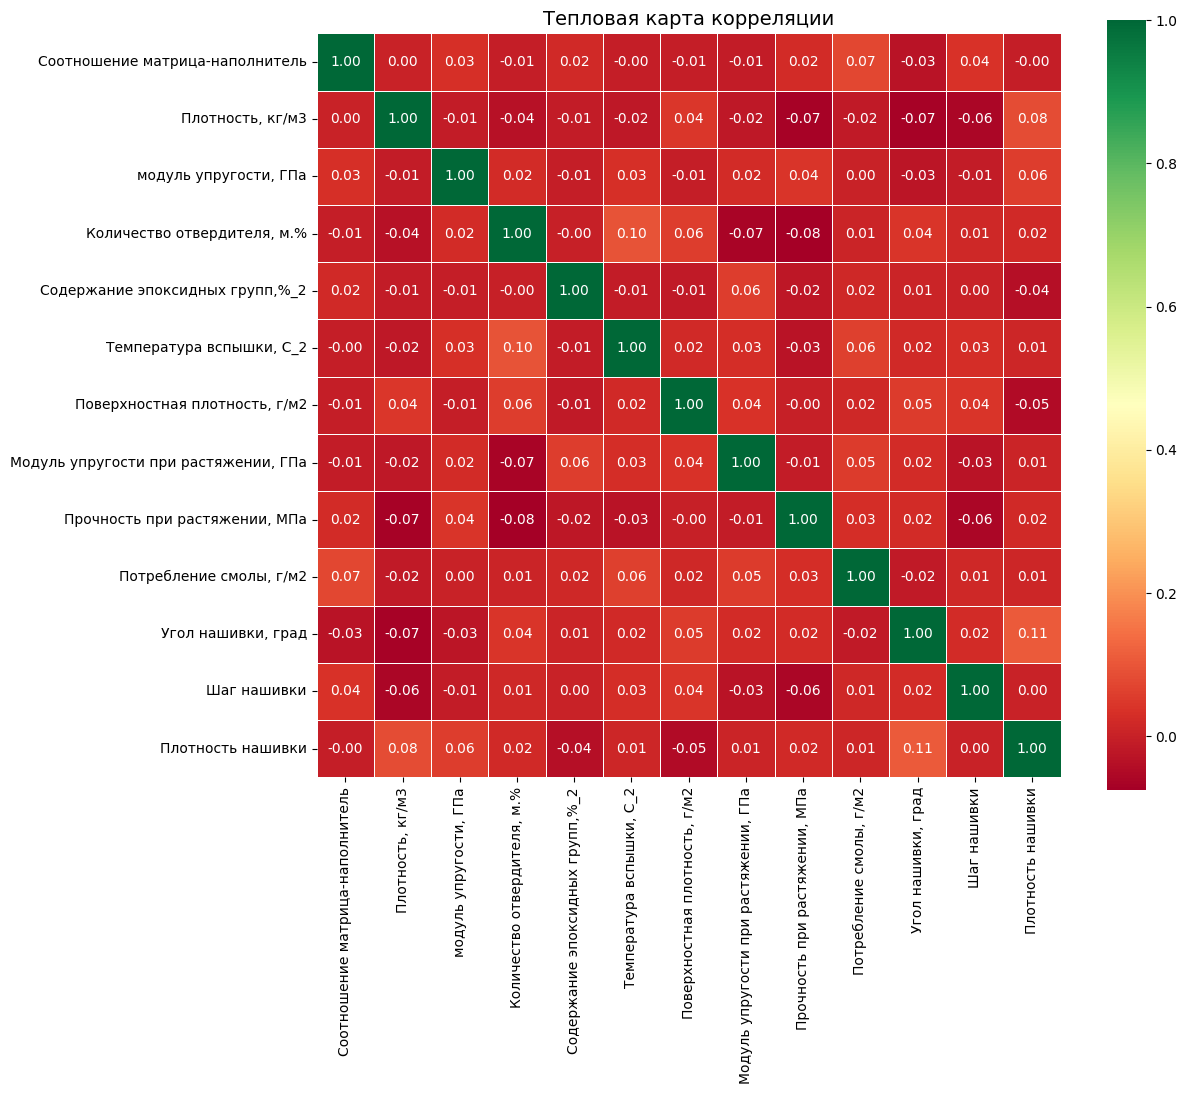

In [49]:
# Расчет корреляции
corr = df.corr()

# Построение тепловой карты
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="RdYlGn",
    linewidths=0.5,
    square=True
)
plt.title("Тепловая карта корреляции", fontsize=14)
plt.show()

In [50]:
df.corr(method ='pearson')

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,0.003841,0.031700,-0.006445,0.019766,-0.004776,-0.006272,-0.008411,0.024148,0.072531,-0.031073,0.036437,-0.004652
"Плотность, кг/м3",0.003841,1.000000,-0.009647,-0.035911,-0.008278,-0.020695,0.044930,-0.017602,-0.069981,-0.015937,-0.068474,-0.061015,0.080304
"модуль упругости, ГПа",0.031700,-0.009647,1.000000,0.024049,-0.006804,0.031174,-0.005306,0.023267,0.041868,0.001840,-0.025417,-0.009875,0.056346
"Количество отвердителя, м.%",-0.006445,-0.035911,0.024049,1.000000,-0.000684,0.095193,0.055198,-0.065929,-0.075375,0.007446,0.038570,0.014887,0.017248
"Содержание эпоксидных групп,%_2",0.019766,-0.008278,-0.006804,-0.000684,1.000000,-0.009769,-0.012940,0.056828,-0.023899,0.015165,0.008052,0.003022,-0.039073
"Температура вспышки, С_2",-0.004776,-0.020695,0.031174,0.095193,-0.009769,1.000000,0.020121,0.028414,-0.031763,0.059954,0.020695,0.025795,0.011391
"Поверхностная плотность, г/м2",-0.006272,0.044930,-0.005306,0.055198,-0.012940,0.020121,1.000000,0.036702,-0.003210,0.015692,0.052299,0.038332,-0.049923
"Модуль упругости при растяжении, ГПа",-0.008411,-0.017602,0.023267,-0.065929,0.056828,0.028414,0.036702,1.000000,-0.009009,0.050938,0.023003,-0.029468,0.006476
"Прочность при растяжении, МПа",0.024148,-0.069981,0.041868,-0.075375,-0.023899,-0.031763,-0.003210,-0.009009,1.000000,0.028602,0.023398,-0.059547,0.019604
"Потребление смолы, г/м2",0.072531,-0.015937,0.001840,0.007446,0.015165,0.059954,0.015692,0.050938,0.028602,1.000000,-0.015334,0.013394,0.012239


In [51]:
df.corr(method ='kendall')

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,-0.003135,0.021247,0.001410,0.010180,-0.009480,-0.002060,-0.004157,0.011614,0.035145,-0.021395,0.022723,0.002788
"Плотность, кг/м3",-0.003135,1.000000,-0.008059,-0.021963,-0.007758,-0.019947,0.037302,-0.021151,-0.047426,-0.017079,-0.051525,-0.031220,0.052935
"модуль упругости, ГПа",0.021247,-0.008059,1.000000,0.022382,0.002351,0.021028,-0.000442,0.005458,0.022959,0.005169,-0.031695,-0.008305,0.049347
"Количество отвердителя, м.%",0.001410,-0.021963,0.022382,1.000000,0.000010,0.059034,0.033110,-0.043140,-0.046507,-0.003677,0.024690,0.006232,0.016607
"Содержание эпоксидных групп,%_2",0.010180,-0.007758,0.002351,0.000010,1.000000,-0.002170,-0.006859,0.041994,-0.013441,0.009756,0.004668,-0.004539,-0.021968
"Температура вспышки, С_2",-0.009480,-0.019947,0.021028,0.059034,-0.002170,1.000000,0.017196,0.016481,-0.019106,0.035313,0.017880,0.029552,0.005268
"Поверхностная плотность, г/м2",-0.002060,0.037302,-0.000442,0.033110,-0.006859,0.017196,1.000000,0.024051,-0.005099,-0.004446,0.045452,0.025514,-0.022320
"Модуль упругости при растяжении, ГПа",-0.004157,-0.021151,0.005458,-0.043140,0.041994,0.016481,0.024051,1.000000,-0.006599,0.034814,0.022431,-0.010024,-0.002600
"Прочность при растяжении, МПа",0.011614,-0.047426,0.022959,-0.046507,-0.013441,-0.019106,-0.005099,-0.006599,1.000000,0.013580,0.020609,-0.048049,0.009821
"Потребление смолы, г/м2",0.035145,-0.017079,0.005169,-0.003677,0.009756,0.035313,-0.004446,0.034814,0.013580,1.000000,-0.002402,0.005962,0.010792


In [52]:
def find_outliers_iqr(data):
    outliers = pd.DataFrame()
    for col in data.select_dtypes(include=['number']): 
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers[col] = ~data[col].between(lower, upper) 
    return outliers

outliers_iqr = find_outliers_iqr(df)
print("Выбросы по IQR:")
print(outliers_iqr.sum())  

Выбросы по IQR:
Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64


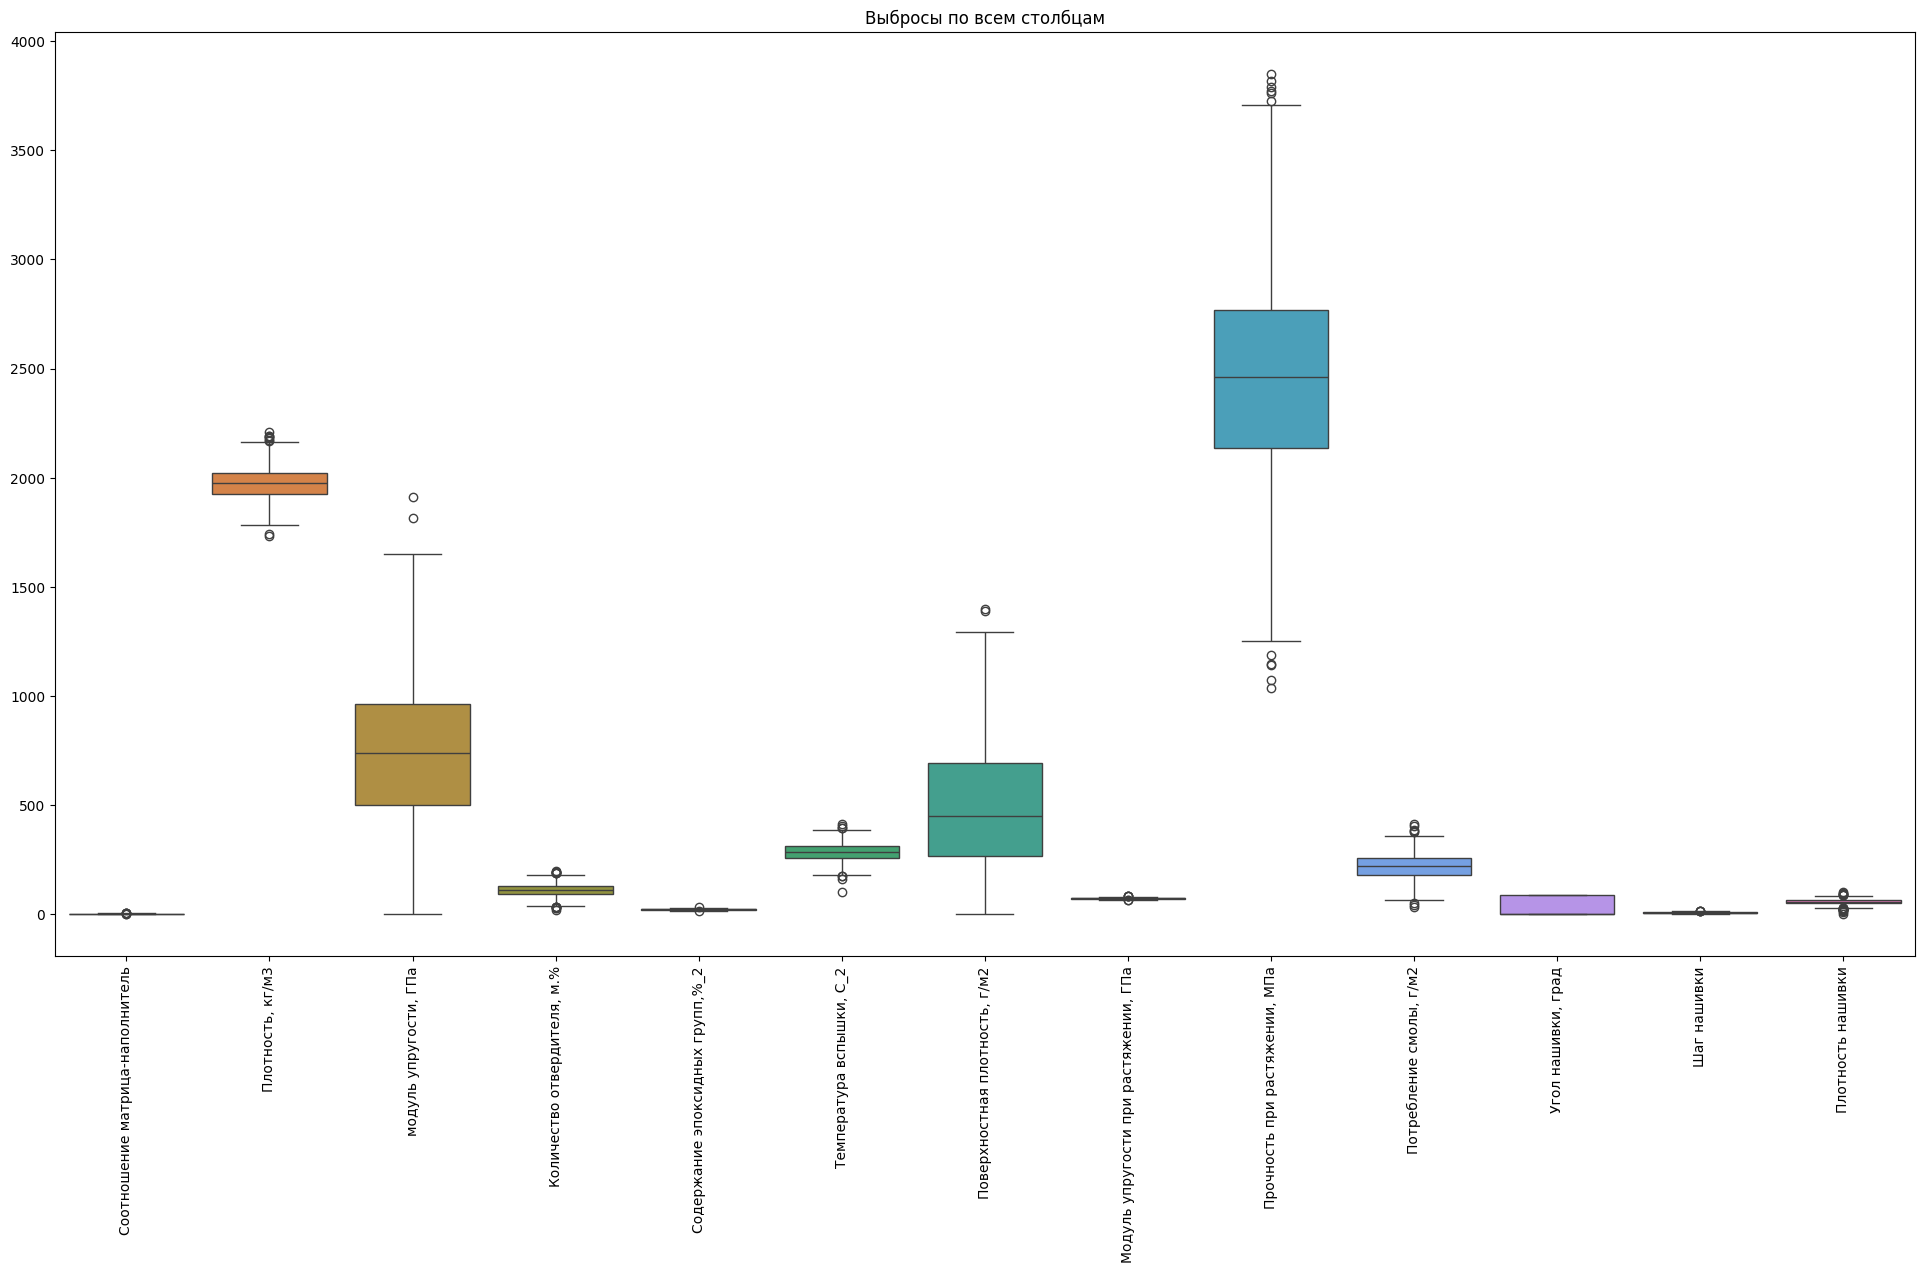

In [53]:
plt.figure(figsize=(24, 12))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.title("Выбросы по всем столбцам")
plt.show()

In [54]:
def replace_outliers_iqr_with_mean(data):
    data_clean = data.copy()
    for col in data.select_dtypes(include=['number']):
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mean_val = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)][col].mean()
        data_clean[col] = np.where(
            (data[col] < lower_bound) | (data[col] > upper_bound),
            mean_val,
            data[col]
        )
    return data_clean

In [55]:
(df.isnull().mean()).rename('доля выбросов').to_frame().style.bar(vmax=1, vmin=0).format('{:.2%}')

,доля выбросов
Соотношение матрица-наполнитель,0.00%
"Плотность, кг/м3",0.00%
"модуль упругости, ГПа",0.00%
"Количество отвердителя, м.%",0.00%
"Содержание эпоксидных групп,%_2",0.00%
"Температура вспышки, С_2",0.00%
"Поверхностная плотность, г/м2",0.00%
"Модуль упругости при растяжении, ГПа",0.00%
"Прочность при растяжении, МПа",0.00%
"Потребление смолы, г/м2",0.00%


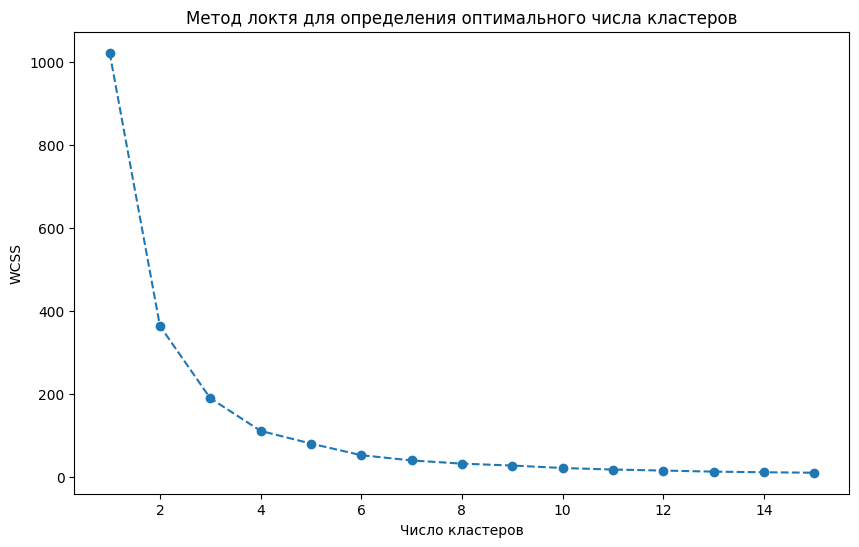

Средний коэффициент силуэта: 0.547

Средние значения по кластерам:
         Модуль упругости при растяжении, ГПа
Cluster                                      
0                                   74.128333
1                                   67.258207
2                                   76.178583
3                                   79.129224
4                                   69.880911
5                                   72.106326


In [56]:
cluster_features = ['Модуль упругости при растяжении, ГПа']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[cluster_features])

wcss = []  
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), wcss, marker='o', linestyle='--')
plt.title('Метод локтя для определения оптимального числа кластеров')
plt.xlabel('Число кластеров')
plt.ylabel('WCSS')
plt.show()

optimal_clusters = 6
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df['Cluster'] = clusters

silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"Средний коэффициент силуэта: {silhouette_avg:.3f}")

cluster_stats = df.groupby('Cluster')[cluster_features].mean()
print("\nСредние значения по кластерам:")
print(cluster_stats)

In [57]:
df['Cluster'] = np.nan
df.loc[df.index, 'Cluster'] = clusters
print(f"Размер df: {len(df)}")
print(f"Уникальные кластеры: {df['Cluster'].unique()}")

Размер df: 1023
Уникальные кластеры: [4. 0. 3. 2. 5. 1.]


In [58]:
def evaluate_model(y_true, y_pred):
    print(f'MAE: {mean_absolute_error(y_true, y_pred):.4f}')
    print(f'R2: {r2_score(y_true, y_pred):.4f}')
    print(f'MSE: {mean_squared_error(y_true, y_pred):.4f}') 
    print(f'RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}')

In [59]:
df['Cluster'] = clusters

X = df.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)
y = df['Модуль упругости при растяжении, ГПа']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [60]:
print(len(X_train.columns))
X_train.head()

12


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,Cluster
ID,,,,,,,,,,,,
604,3.578784,1862.679792,341.672132,75.068600,25.956842,312.790306,9.046203,160.519027,90.0,10.264664,73.738350,5
227,2.927797,2006.130229,950.619006,154.668800,24.180832,295.136522,710.118283,142.512092,0.0,6.625209,43.354425,4
970,2.279886,1946.473054,1008.415902,151.684921,23.267756,293.317127,282.038385,211.029671,90.0,4.517337,48.264796,5
497,3.016343,2079.295010,1122.119595,105.588808,25.181815,268.548003,292.979124,166.876118,0.0,0.730260,84.015247,4
919,2.030340,1960.657425,914.439785,119.615352,23.325002,227.147788,86.252875,76.023075,90.0,6.624530,66.958941,5


In [61]:
model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=7,
    random_state=42
)

In [62]:
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=7, random_state=42)

In [63]:
y_pred = model.predict(X_test)
print("\nОценка модели на тестовых данных:")
evaluate_model(y_test, y_pred)


Оценка модели на тестовых данных:
MAE: 0.6183
R2: 0.9325
MSE: 0.6706
RMSE: 0.8189


In [64]:
data_to_check = 111
print(X_train.iloc[data_to_check])
print()
print(y_train.iloc[data_to_check])

Соотношение матрица-наполнитель       1.042215
Плотность, кг/м3                   1866.605523
модуль упругости, ГПа               693.578011
Количество отвердителя, м.%         153.507157
Содержание эпоксидных групп,%_2      18.309488
Температура вспышки, С_2            351.969637
Поверхностная плотность, г/м2       426.504213
Потребление смолы, г/м2             147.831879
Угол нашивки, град                   90.000000
Шаг нашивки                           8.262472
Плотность нашивки                    47.813665
Cluster                               4.000000
Name: 689, dtype: float64

70.1084162429248


In [65]:
model.predict(X_test.iloc[data_to_check:data_to_check+1])

array([73.87325227])

In [66]:
X_test.insert(0, 'pred', y_pred) 
X_test.insert(9, 'Модуль упругости при растяжении, ГПа', y_pred)
X_test.insert(10, 'Прочность при растяжении, МПа', y_pred)
X_test.head()

,pred,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Угол нашивки, град",Шаг нашивки,Плотность нашивки,Cluster
ID,,,,,,,,,,,,,,,
525,75.661271,3.790051,1962.764956,673.263749,73.780951,18.800746,351.088180,412.504400,271.263323,75.661271,75.661271,0.0,5.333214,44.180650,2
357,76.587686,2.661267,1948.878616,719.246538,97.874782,21.376260,273.888846,976.777577,162.998234,76.587686,76.587686,0.0,7.358027,49.360765,2
444,73.608681,3.174404,1980.823788,459.047070,81.162535,21.787358,322.371649,233.898871,200.414215,73.608681,73.608681,0.0,3.717884,48.955385,0
31,69.552252,1.771436,1872.491560,801.033883,79.794548,22.296304,340.736898,864.929184,123.356264,69.552252,69.552252,90.0,7.000000,70.000000,4
618,72.026535,3.276517,1911.245306,213.466388,78.847811,21.778934,226.990371,113.590494,223.770443,72.026535,72.026535,90.0,8.776210,58.450719,5


In [67]:
with open('model_1.sav', 'wb') as f:
    pickle.dump(model, f)
    
with open('model_1.sav', 'rb') as f: 
    model_1 = pickle.load(f)

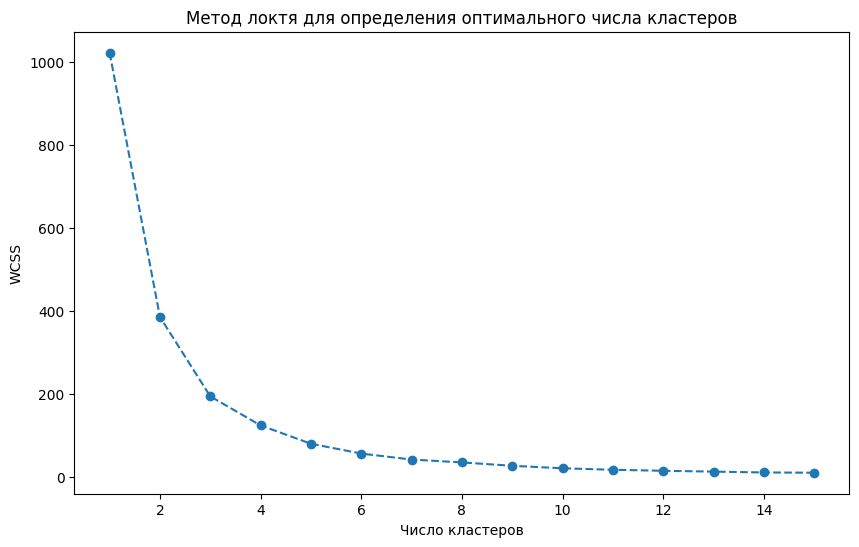

Средний коэффициент силуэта: 0.530

Средние значения по кластерам:
         Прочность при растяжении, МПа
Cluster                               
0                          1988.835610
1                          2984.503349
2                          2654.449928
3                          1536.126573
4                          3440.039883
5                          2345.976927


In [68]:
cluster_features = ['Прочность при растяжении, МПа']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[cluster_features])

wcss = []  
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), wcss, marker='o', linestyle='--')
plt.title('Метод локтя для определения оптимального числа кластеров')
plt.xlabel('Число кластеров')
plt.ylabel('WCSS')
plt.show()

optimal_clusters = 6
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df['Cluster'] = clusters

silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"Средний коэффициент силуэта: {silhouette_avg:.3f}")

cluster_stats = df.groupby('Cluster')[cluster_features].mean()
print("\nСредние значения по кластерам:")
print(cluster_stats)

In [69]:
df['Cluster'] = np.nan
df.loc[df.index, 'Cluster'] = clusters
print(f"Размер df: {len(df)}")
print(f"Уникальные кластеры: {df['Cluster'].unique()}")

Размер df: 1023
Уникальные кластеры: [1. 0. 5. 2. 4. 3.]


In [70]:
def evaluate_model(y_true, y_pred):
    print(f'MAE: {mean_absolute_error(y_true, y_pred):.4f}')
    print(f'R2: {r2_score(y_true, y_pred):.4f}')
    print(f'MSE: {mean_squared_error(y_true, y_pred):.4f}') 
    print(f'RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}')

In [71]:
df['Cluster'] = clusters

X = df.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)
y = df['Прочность при растяжении, МПа']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [72]:
print(len(X_train.columns))
X_train.head()

12


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,Cluster
ID,,,,,,,,,,,,
604,3.578784,1862.679792,341.672132,75.068600,25.956842,312.790306,9.046203,160.519027,90.0,10.264664,73.738350,3
227,2.927797,2006.130229,950.619006,154.668800,24.180832,295.136522,710.118283,142.512092,0.0,6.625209,43.354425,3
970,2.279886,1946.473054,1008.415902,151.684921,23.267756,293.317127,282.038385,211.029671,90.0,4.517337,48.264796,5
497,3.016343,2079.295010,1122.119595,105.588808,25.181815,268.548003,292.979124,166.876118,0.0,0.730260,84.015247,5
919,2.030340,1960.657425,914.439785,119.615352,23.325002,227.147788,86.252875,76.023075,90.0,6.624530,66.958941,0


In [73]:
model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=4),
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

In [74]:
model.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  learning_rate=0.1, n_estimators=100, random_state=42)

In [75]:
y_pred = model.predict(X_test)
print("\nОценка модели на тестовых данных:")
evaluate_model(y_test, y_pred)


Оценка модели на тестовых данных:
MAE: 93.3244
R2: 0.9437
MSE: 12601.9358
RMSE: 112.2583


In [76]:
y_pred = model.predict(X_test) 

In [77]:
data_to_check = 111
print(X_train.iloc[data_to_check])
print()
print(y_train.iloc[data_to_check])

Соотношение матрица-наполнитель       1.042215
Плотность, кг/м3                   1866.605523
модуль упругости, ГПа               693.578011
Количество отвердителя, м.%         153.507157
Содержание эпоксидных групп,%_2      18.309488
Температура вспышки, С_2            351.969637
Поверхностная плотность, г/м2       426.504213
Потребление смолы, г/м2             147.831879
Угол нашивки, град                   90.000000
Шаг нашивки                           8.262472
Плотность нашивки                    47.813665
Cluster                               5.000000
Name: 689, dtype: float64

2461.45510738333


In [78]:
model.predict(X_test.iloc[data_to_check:data_to_check+1])

array([2345.16491276])

In [79]:
X_test.insert(0, 'pred', y_pred) 
X_test.insert(9, 'Модуль упругости при растяжении, ГПа', y_pred)
X_test.insert(10, 'Прочность при растяжении, МПа', y_pred)
X_test.head()

,pred,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Угол нашивки, град",Шаг нашивки,Плотность нашивки,Cluster
ID,,,,,,,,,,,,,,,
525,2652.530877,3.790051,1962.764956,673.263749,73.780951,18.800746,351.088180,412.504400,271.263323,2652.530877,2652.530877,0.0,5.333214,44.180650,2
357,2337.786909,2.661267,1948.878616,719.246538,97.874782,21.376260,273.888846,976.777577,162.998234,2337.786909,2337.786909,0.0,7.358027,49.360765,5
444,2341.320842,3.174404,1980.823788,459.047070,81.162535,21.787358,322.371649,233.898871,200.414215,2341.320842,2341.320842,0.0,3.717884,48.955385,5
31,2653.862850,1.771436,1872.491560,801.033883,79.794548,22.296304,340.736898,864.929184,123.356264,2653.862850,2653.862850,90.0,7.000000,70.000000,2
618,2653.520714,3.276517,1911.245306,213.466388,78.847811,21.778934,226.990371,113.590494,223.770443,2653.520714,2653.520714,90.0,8.776210,58.450719,2


In [80]:
with open('model_2.sav', 'wb') as f:
    pickle.dump(model, f)
    
with open('model_2.sav', 'rb') as f: 
    model_2 = pickle.load(f)

In [81]:
def load_and_prepare_data():
    input_features = [
        "Плотность, кг/м3", "модуль упругости, ГПа", 
        "Количество отвердителя, м.%", "Содержание эпоксидных групп,%_2",
        "Температура вспышки, С_2", "Поверхностная плотность, г/м2",
        "Прочность при растяжении, МПа", "Модуль упругости при растяжении, ГПа",
        "Потребление смолы, г/м2", "Угол нашивки, град", 
        "Шаг нашивки", "Плотность нашивки"
    ]
    target = 'Соотношение матрица-наполнитель'

    X = df[input_features]
    y = df[[target]]
    
    return X, y

In [82]:
def build_model():
    model = keras.Sequential()
    
    # Фиксированная архитектура: 2 слоя по 8 нейронов
    model.add(layers.Dense(8, activation='relu', input_shape=(12,)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Dense(1))
    
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    
    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['mae', keras.metrics.MeanAbsolutePercentageError(name='mape')]
    )
    return model

In [83]:
def train_with_cv(X, y, n_splits=5, epochs=100):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    cv_scores = []
    histories = []
    
    for train_idx, val_idx in kfold.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Масштабирование
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        
        model = build_model()
        
        early_stopping = callbacks.EarlyStopping(
            patience=10,
            restore_best_weights=True
        )
        
        history = model.fit(
            X_train_scaled, y_train,
            validation_data=(X_val_scaled, y_val),
            epochs=epochs,
            batch_size=32,
            callbacks=[early_stopping],
            verbose=0
        )
        
        val_loss, val_mae, val_mape = model.evaluate(X_val_scaled, y_val, verbose=0)
        cv_scores.append(val_mae)
        histories.append(history)
    
    return cv_scores, histories

d:\DATA SCIENCE Practice\Diploma\diploma\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\DATA SCIENCE Practice\Diploma\diploma\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\DATA SCIENCE Practice\Diploma\diploma\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  su

Average CV MAE: 0.7413 ± 0.0394
Epoch 1/100


d:\DATA SCIENCE Practice\Diploma\diploma\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.6055 - mae: 2.1078 - mape: 70.1854 - val_loss: 4.8513 - val_mae: 1.9169 - val_mape: 63.0069
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6623 - mae: 1.8629 - mape: 62.7955 - val_loss: 4.0071 - val_mae: 1.6925 - val_mape: 55.8532
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1465 - mae: 1.7114 - mape: 57.0801 - val_loss: 3.4366 - val_mae: 1.5451 - val_mape: 51.5185
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6492 - mae: 1.6071 - mape: 54.4440 - val_loss: 3.0065 - val_mae: 1.4366 - val_mape: 48.5477
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1049 - mae: 1.4653 - mape: 51.5479 - val_loss: 2.7073 - val_mae: 1.3565 - val_mape: 46.3855
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2268 - mae: 1.4830 - mape: 52.5443 - val_loss: 2.4839 - val_mae: 1.2934 - val_mape: 44.6314
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9633 - mae: 1.3807 - mape: 51.527

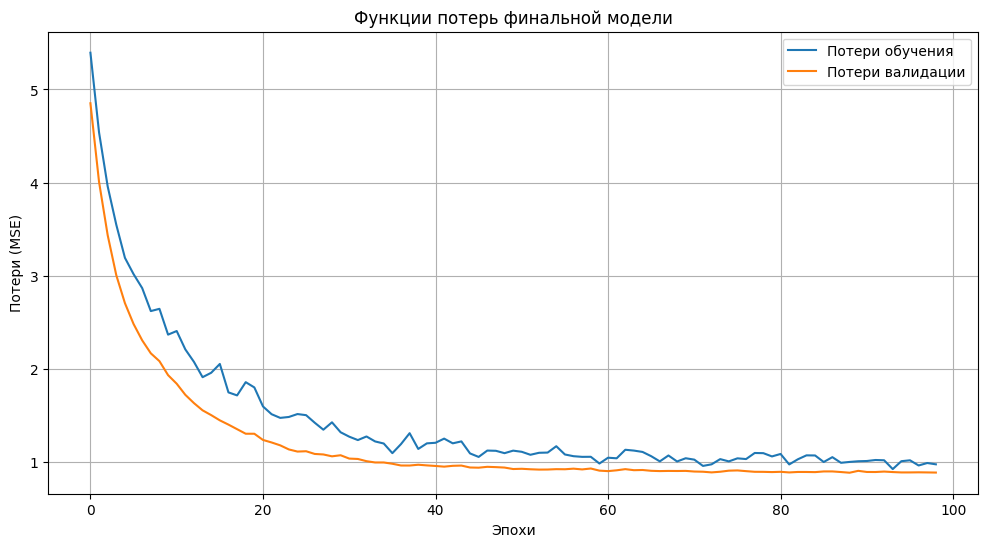

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8920 - mae: 0.7722 - mape: 29.9196 
Test MAE: 0.7629
Test MAPE: 30.48%
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


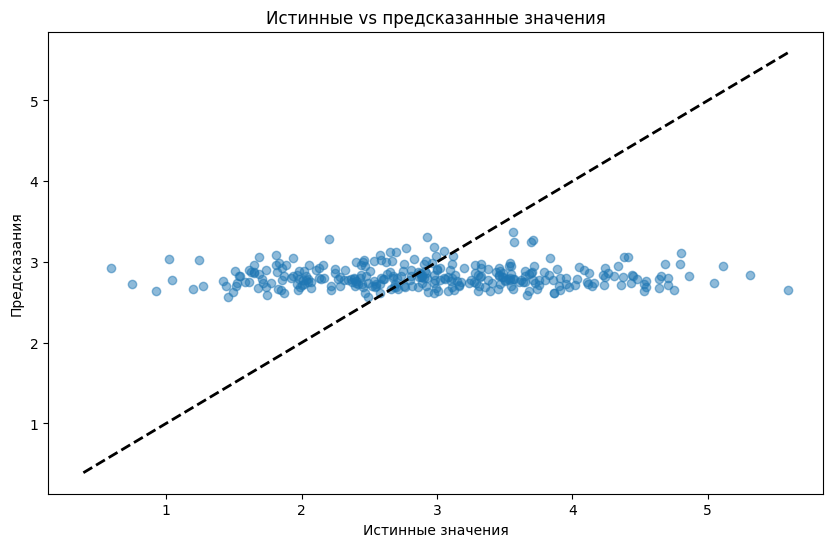

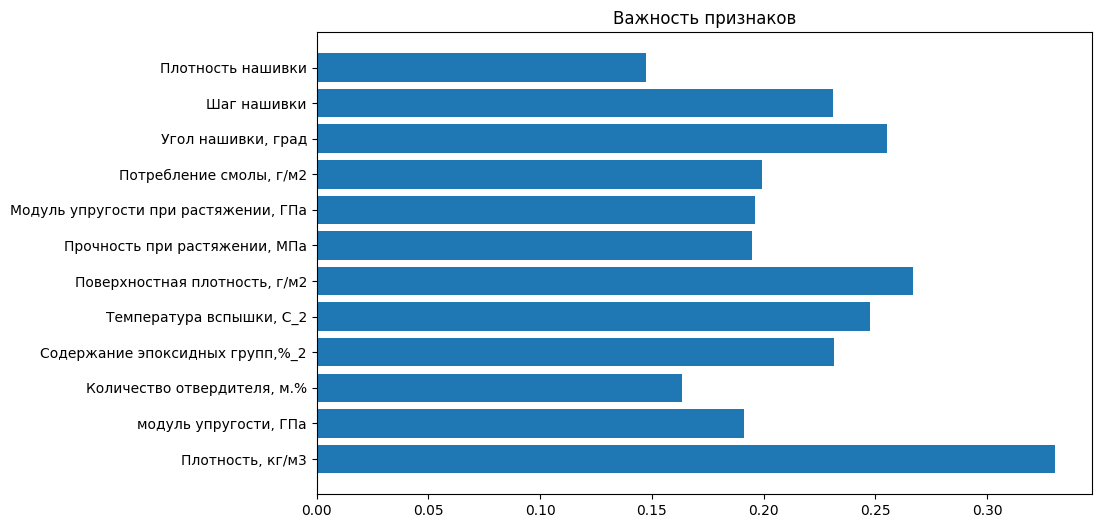

In [84]:
def main():
    # Загрузка данных
    X, y = load_and_prepare_data()
    
    # Кросс-валидация
    cv_scores, histories = train_with_cv(X, y)
    print(f"Average CV MAE: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
    
    # Окончательное обучение на всех данных
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Создание и обучение модели с фиксированной архитектурой
    model = build_model()
    
    # Обучение модели с историей
    history = model.fit(
        X_train_scaled, y_train,
        validation_data=(X_test_scaled, y_test),
        epochs=100,
        batch_size=32,
        callbacks=[callbacks.EarlyStopping(patience=10, restore_best_weights=True)],
        verbose=1
    )
    
    # Визуализация функции потерь для финального обучения
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Потери обучения')
    plt.plot(history.history['val_loss'], label='Потери валидации')
    plt.title('Функции потерь финальной модели')
    plt.ylabel('Потери (MSE)')
    plt.xlabel('Эпохи')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Оценка на тестовых данных
    test_loss, test_mae, test_mape = model.evaluate(X_test_scaled, y_test)
    print(f"Test MAE: {test_mae:.4f}")
    print(f"Test MAPE: {test_mape:.2f}%")
    
    # Прогнозирование
    y_pred = model.predict(X_test_scaled)
    
    # Визуализация результатов
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказания')
    plt.title('Истинные vs предсказанные значения')
    plt.show()
    
    # Сохранение модели
    model.save('dnn_model.keras')
    
    # Важность признаков (пример)
    feature_importance = np.abs(model.layers[0].get_weights()[0]).mean(axis=1)
    plt.figure(figsize=(10, 6))
    plt.barh(X.columns, feature_importance)
    plt.title('Важность признаков')
    plt.show()

if __name__ == "__main__":
    main()

In [85]:
def calculate_regression_metrics(y_true, y_pred):
    metrics = {
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R2': r2_score(y_true, y_pred),
        'MAPE (%)': mean_absolute_percentage_error(y_true, y_pred) * 100
    }
    return metrics

def print_metrics_table(metrics):
    """"""
    print("\nРегрессионные метрики:")
    print("{:<20} {:<10}".format('Метрика', 'Значение'))
    print("-" * 30)
    for name, value in metrics.items():
        print("{:<20} {:<10.4f}".format(name, value))

if __name__ == "__main__":
    y_true = df['Соотношение матрица-наполнитель'].values
    y_pred = df['Соотношение матрица-наполнитель'].values * 0.95
    
    # Вычисление метрик
    metrics = calculate_regression_metrics(y_true, y_pred)
    
    # Вывод результатов
    print_metrics_table(metrics)

# %%
model = keras.models.load_model('dnn_model.keras')
model.summary()


Регрессионные метрики:
Метрика              Значение  
------------------------------
MAE                  0.1465    
MSE                  0.0236    
RMSE                 0.1535    
R2                   0.9717    
MAPE (%)             5.0000    


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 557 (2.18 KB)

 Trainable params: 185 (740.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 372 (1.46 KB)